Data prepration  & EDA
---

In [1]:
# importing libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi']=70

In [2]:
# Read the data into pandas dataframe
train_data = pd.read_csv("../data/data-training.csv")
test_data = pd.read_csv("../data/data-provisional.csv")
train_data.head()

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0000001,0,1,1,1,0,1,0,0,0,9,9,9,0,0,2
1,RE-TRAIN-0000002,0,1,1,1,0,1,0,0,0,9,9,9,0,0,4
2,RE-TRAIN-0000003,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1
3,RE-TRAIN-0000004,0,1,1,1,0,1,0,1,0,9,9,9,0,0,1
4,RE-TRAIN-0000005,0,1,1,1,0,1,1,0,0,0,9,9,0,0,2


In [3]:
# shape
print("Number of instances::", train_data.shape[0])
print("Number of attributes::", train_data.shape[1])

Number of instances:: 196462
Number of attributes:: 16


In [4]:
# Columns
print("List of columns::", train_data.columns.tolist())

List of columns:: ['id', 'menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi', 'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'count']


Data Preparation
---

Replace the integer values of the each column with its corresponding values for further analysis

In [5]:
def data_format(df, data_type='test'):
    df.rename(columns={col: col.lower() for col in df.columns.tolist()}, inplace=True)

    # column 1 - menopaus
    menopaus_values = {
        0 : 'premenopausal',
        1 : 'postmenopausal',
        9 : np.nan 
        }
        
    df['menopaus'] = df.menopaus.replace(menopaus_values)
    
    # column 2 - agegrp
    agegrp_values = {
        1 : '35-39',
        2 : '40-44',
        3 : '45-49',
        4 : '50-54',
        5 : '55-59',
        6 : '60-64',
        7 : '65-69',
        8 : '70-74',
        9 : '75-59',
        10: '80-84'
    }
    df['agegrp'] = df.agegrp.replace(agegrp_values)


    # column 3 - density
    density_values = {
        1 : 'almost entirely fat',
        2 : 'scattered fibroglandular',
        3 : 'heterogeneously',
        4 : 'extremely dense',
        9 : np.nan
    }
    df['density'] = df.density.replace(density_values)

    # column 4 - race
    race_values = {
        1 : 'white',
        2 : 'asian/pacific',
        3 : 'black',
        4 : 'native american',
        5 : 'other/mixed',
        9 : np.nan
    }

    df['race'] = df.race.replace(race_values)


    # column 5 - hispanic 
    hispanic_values = {
        0 : 'no',
        1 : 'yes',
        9 : np.nan
    }

    df['hispanic'] = df.hispanic.replace(hispanic_values)


    # column 6 - bmi - body mass index
    bmi_values = {
        1 : '10-24.99',
        2 : '25-29.99',
        3 : '30-34.99',
        4 : '35 or more',
        9 : np.nan
    }

    df['bmi'] = df.bmi.replace(bmi_values)


    # column 7 - agefirst - age at the first birth
    agefirst_values = {
        0 : 'age <30',
        1 : 'age 30 or greater',
        2 : 'Nulliparous',
        9 : np.nan
    }
    df['agefirst'] = df.agefirst.replace(agefirst_values)

    # column 8 - nrelbc - Number of first degree relatives with breast cancer - number of relative with breast cancer
    nrelbc_values = {
        0 : 'zero',
        1 : 'one',
        2 : '2 or more',
        9 : np.nan
    }

    df['nrelbc'] = df. nrelbc.replace(nrelbc_values)


    # column 9 - brstproc - previous breast procedure
    brstproc_values = {
        0 : 'no',
        1 : 'yes',
        9 : np.nan
    }
    df['brstproc'] = df.brstproc.replace(brstproc_values)



    # column 10 - lastmamm - result of last mammogram before the index mammogram
    lastmamm_values = {
        0 : 'negative',
        1 : 'false positive',
        9 : np.nan
    }
    df['lastmamm'] = df.lastmamm.replace(lastmamm_values)


    # column 11 - surgmeno - surgical menopause 
    surgmeno_values = {
        0 : 'natural',
        1 : 'surgical',
        9 : np.nan
    }
    df['surgmeno'] = df.surgmeno.replace(surgmeno_values)


    # column 12 - hrt - current hormone therapy
    hrt_values = {
        0 : 'no',
        1 : 'yes',
        9 : np.nan
    }
    df['hrt'] = df.hrt.replace(hrt_values)


    # column 13 - invasive - diagnosis of invasive brease cancer within one year of the index screening mammogram
    invasive_values = {
        0 : 'no',
        1 : 'yes'
    }
    df['invasive'] = df.invasive.replace(invasive_values)

    if data_type == 'train':
        # column 14 - cancer - diagnosis of invasive or ductual carcinoma in situ breast cancer within one year of the index screening mammogram
        cancer_values = {
            0 : 'no',
            1 : 'yes'
        }
        df['cancer'] = df.cancer.replace(cancer_values)

    return df

In [6]:
# format the values in dataset.
train_df = data_format(train_data, data_type='train')

# test data
test_df = data_format(test_data)

In [7]:
# Now let's look at training dataset
train_df.head()

,id,menopaus,agegrp,density,race,hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0000001,premenopausal,35-39,almost entirely fat,white,no,10-24.99,age <30,zero,no,NaN,NaN,NaN,no,no,2
1,RE-TRAIN-0000002,premenopausal,35-39,almost entirely fat,white,no,10-24.99,age <30,zero,no,NaN,NaN,NaN,no,no,4
2,RE-TRAIN-0000003,premenopausal,35-39,almost entirely fat,white,no,10-24.99,age <30,one,no,negative,NaN,NaN,no,no,1
3,RE-TRAIN-0000004,premenopausal,35-39,almost entirely fat,white,no,10-24.99,age <30,one,no,NaN,NaN,NaN,no,no,1
4,RE-TRAIN-0000005,premenopausal,35-39,almost entirely fat,white,no,10-24.99,age 30 or greater,zero,no,negative,NaN,NaN,no,no,2


In [8]:
# missing values
cols_with_missing_data =  train_df.columns[train_df.isnull().any()].tolist()
print("Columns with missing data::", cols_with_missing_data)

# missing data
train_df.isnull().sum()

Columns with missing data:: ['menopaus', 'density', 'race', 'hispanic', 'bmi', 'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']


id              0
menopaus    11043
agegrp          0
density     49730
race        40451
hispanic    59899
bmi         76505
agefirst    64061
nrelbc      27786
brstproc    25377
lastmamm    65061
surgmeno    84860
hrt         65734
invasive        0
cancer          0
count           0
dtype: int64

In [9]:
# Replace the null values with most common values in the column/attribute.
for col in cols_with_missing_data:
    value = train_df[col].mode()[0]
    train_df[col].fillna(value=value, inplace=True)

In [10]:
# Save it into csv files
train_df.to_csv("../data/train.csv", index=False)
test_df.to_csv("../data/test.csv", index=False)

In [11]:
# split the training data into training, validation and testing dataset.
df_full, df_test = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True, stratify=train_df['cancer'])
df_train, df_valid = train_test_split(df_full, test_size=0.25, random_state=42, shuffle=True, stratify=df_full['cancer'])

In [12]:
df_train.reset_index(drop=True, inplace=True)
df_valid.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

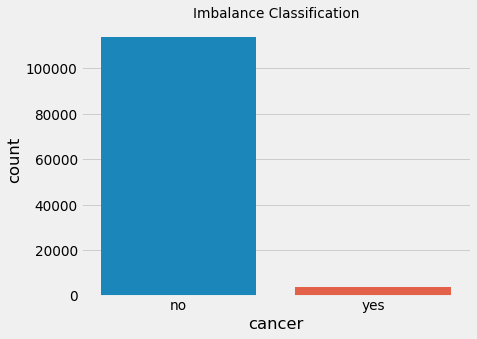

In [13]:
# Response variable - Cancer
sns.countplot(data=df_train, x='cancer')
plt.title("Imbalance Classification", size=14)
plt.show()

In [14]:
df_train.cancer.value_counts()

no     113964
yes      3912
Name: cancer, dtype: int64

In [15]:
# Hypothesis - chi-square test
"""
Hypothesis:
  - H0(null hypothesis): Two variables are independent(i.e not dependent).
  - H1(alternate hypothesis) : Two variables are dependent.

"""
from scipy import stats

def compute_chi(col1, col2, df=df_train):
    
    alpha = 0.05
    cross_tab = pd.crosstab(df[col1], df[col2])
    result = stats.chi2_contingency(cross_tab)
    p_value = result[1]

    print("P-value::", p_value)
    print("Statistical hypothesis:: %f" %result[0])

    if p_value < alpha:
      return f'Null hypothesis is rejected!, {col1} & {col2} are depenent.'
    
    else:
      return f"Null hypothesis is accepted!, {col1} & {col2} are not dependent"

In [16]:
# Let's find out if cancer depends on menopause or not?
compute_chi("menopaus", 'cancer')

P-value:: 0.21873633754517569
Statistical hypothesis:: 1.512642


'Null hypothesis is accepted!, menopaus & cancer are not dependent'

In [17]:
# Let's find the relation between dense breast type and cancer risk?
compute_chi("density", "cancer")

P-value:: 1.8256812844747355e-71
Statistical hypothesis:: 331.120088


'Null hypothesis is rejected!, density & cancer are depenent.'

In [18]:
# Let's find the relation between the different the variable  and cancer attribute.
cols = ['bmi', 'nrelbc', 'lastmamm', 'invasive']

for col in cols:
    print(col)
    print(compute_chi(col, "cancer"))
    print("---"*10)

bmi
P-value:: 5.112142897142169e-50
Statistical hypothesis:: 231.998988
Null hypothesis is rejected!, bmi & cancer are depenent.
------------------------------
nrelbc
P-value:: 4.189689521544139e-19
Statistical hypothesis:: 84.632980
Null hypothesis is rejected!, nrelbc & cancer are depenent.
------------------------------
lastmamm
P-value:: 1.530730870925699e-17
Statistical hypothesis:: 72.672228
Null hypothesis is rejected!, lastmamm & cancer are depenent.
------------------------------
invasive
P-value:: 0.0
Statistical hypothesis:: 89892.539940
Null hypothesis is rejected!, invasive & cancer are depenent.
------------------------------


In [19]:
df_train.head()

,id,menopaus,agegrp,density,race,hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0011787,premenopausal,40-44,scattered fibroglandular,white,no,10-24.99,age <30,zero,no,negative,natural,no,no,no,6
1,RE-TRAIN-0108715,postmenopausal,60-64,heterogeneously,other/mixed,no,10-24.99,age <30,zero,no,negative,surgical,yes,no,no,4
2,RE-TRAIN-0150504,postmenopausal,70-74,heterogeneously,white,no,10-24.99,age <30,zero,yes,negative,surgical,yes,no,no,1
3,RE-TRAIN-0108265,postmenopausal,60-64,heterogeneously,black,no,10-24.99,age <30,one,no,negative,natural,no,no,no,15
4,RE-TRAIN-0080368,postmenopausal,55-59,heterogeneously,white,no,35 or more,age <30,zero,yes,negative,natural,yes,no,no,38


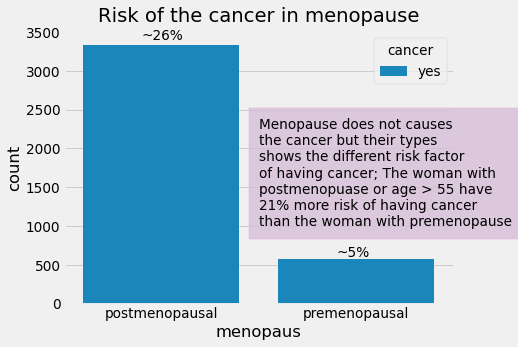

In [20]:
# How common is breast cancer after monopause?
sns.countplot(x='menopaus', hue='cancer', data=df_train[df_train.cancer=='yes'])

plt.title("Risk of the cancer in menopause", pad=10)

plt.text(x=-0.1, y=3400, s='~26%', size=14)
plt.text(x=0.9, y=600, s='~5%', size=14)

notes = """Menopause does not causes \nthe cancer but their types \nshows the different risk factor\nof having cancer; The woman with \npostmenopuase or age > 55 have \n21% more risk of having cancer \nthan the woman with premenopause"""
plt.text(x=0.5, y=1000, s=notes, size=14, bbox={'facecolor':'thistle', 'alpha':0.8, 'edgecolor':'plum', 'pad':10})

plt.show()


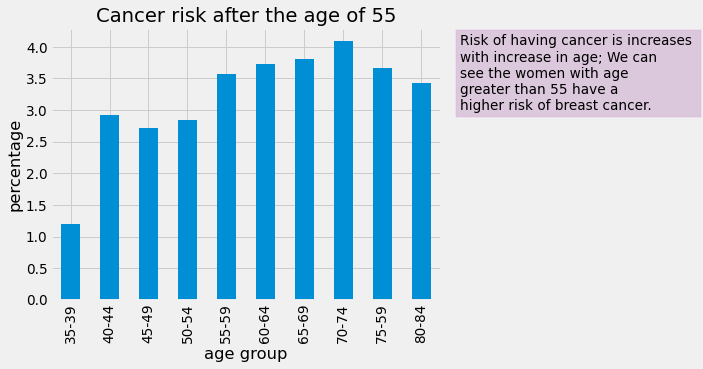

In [21]:
# How common having breast cancer in age greater than 55.
a = df_train[df_train.cancer=='yes'].groupby(by='agegrp').count()['id'] * 100 / df_train.groupby(by='agegrp').count()['id']

# plot
a.plot(kind='bar', label='cancer')

# plot labels
plt.title("Cancer risk after the age of 55")
plt.xlabel("age group")
plt.ylabel("percentage")

# observations
notes = """Risk of having cancer is increases \nwith increase in age; We can \nsee the women with age \ngreater than 55 have a \nhigher risk of breast cancer."""

plt.text(x=10, y=3, s=notes, size=14, bbox={'facecolor':'thistle', 'alpha':0.8, 'edgecolor':'plum'})

plt.show()

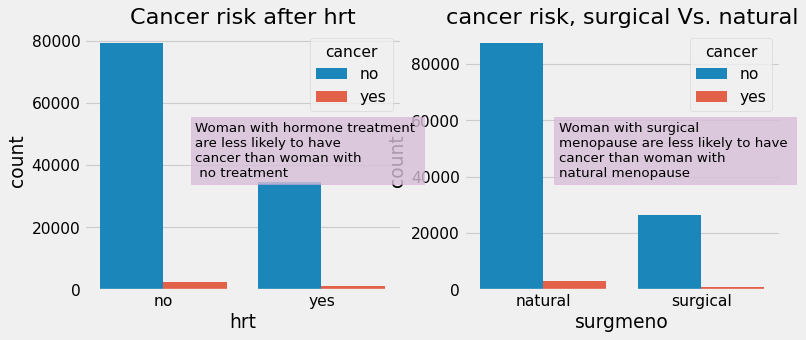

In [22]:
# Does hrt(current hormone treatment) or surgical menopause increase the risk of breast cancer?

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=80)
sns.countplot(data=df_train, x='hrt', hue='cancer', ax=ax1)
ax1.set_title("Cancer risk after hrt")

# observations
notes = """Woman with hormone treatment \nare less likely to have \ncancer than woman with\n no treatment"""
plt.text(x=-2.2, y=40000, s=notes, size=12, bbox={'facecolor':'thistle', 'alpha':0.8, 'edgecolor':'plum'})

sns.countplot(data=df_train, x='surgmeno', hue='cancer', ax=ax2)
ax2.set_title("cancer risk, surgical Vs. natural")

# observations
notes = """Woman with surgical \nmenopause are less likely to have \ncancer than woman with \nnatural menopause"""
plt.text(x=0.1, y=40000, s=notes, size=12, bbox={'facecolor':'thistle', 'alpha':0.8, 'edgecolor':'plum'})

plt.show()

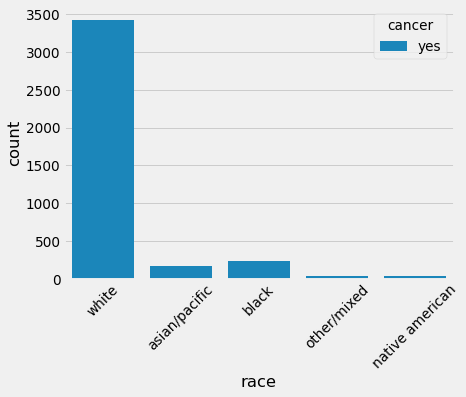

In [23]:
# Woman with breast cancer from different race?
sns.countplot(data=df_train.loc[df_train.cancer=='yes', ['race', 'cancer']], x='race', hue='cancer')
plt.xticks(rotation=45)
plt.show()

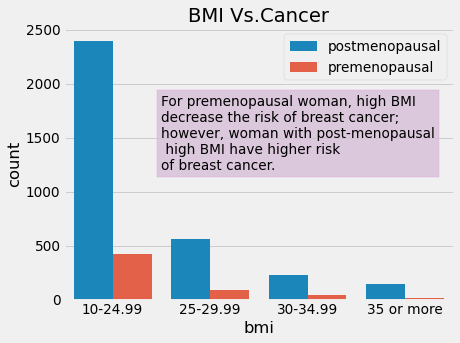

In [24]:
# data preparation
a = df_train[df_train.cancer=='yes'].groupby(by=['bmi', 'menopaus', 'cancer']).count()['id']
a = a.reset_index()

# plot
sns.barplot(data=a, x='bmi', y='id', hue='menopaus')

# Observations
notes = """For premenopausal woman, high BMI \ndecrease the risk of breast cancer;\nhowever, woman with post-menopausal\n high BMI have higher risk \nof breast cancer."""
plt.text(x=.5, y=1200, s=notes, size=14, bbox={'facecolor':'thistle', 'alpha':0.8, 'edgecolor':'plum'})

# labels
plt.title("BMI Vs.Cancer")
plt.ylabel('count')
plt.legend()
plt.show()

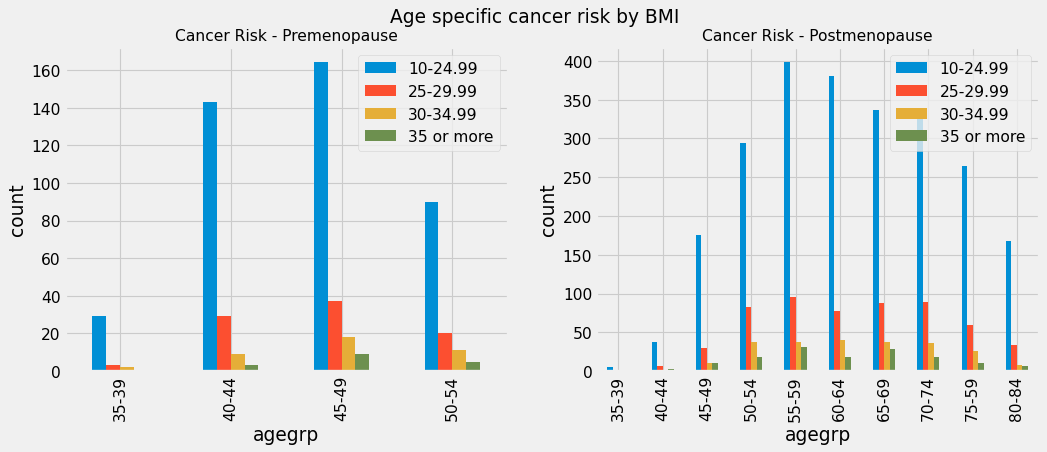

In [25]:
# What is risk of cancer with different age and BMI values?

a = df_train[(df_train.cancer == 'yes') & (df_train.menopaus=='premenopausal')]
b = df_train[(df_train.cancer == 'yes') & (df_train.menopaus=='postmenopausal')]

# plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), dpi=80)
fig.suptitle("Age specific cancer risk by BMI")

# plot 1
a.groupby(by=['agegrp', 'bmi']).count()['id'].unstack().plot(kind='bar', ax=ax1)
ax1.set_title("Cancer Risk - Premenopause", size=14)
ax1.set_ylabel("count")
ax1.legend()

b.groupby(by=['agegrp', 'bmi']).count()['id'].unstack().plot(kind='bar', ax=ax2)
ax2.set_title("Cancer Risk - Postmenopause", size=14)
ax2.set_ylabel("count")

ax2.legend()
plt.show()

From the above plots, we can say that, as age increases, increas in BMI increases the risk of breast cancer in women with post-menopausal or women with age greater than 55 as compare to the women with pre-menopausal having same BMI.

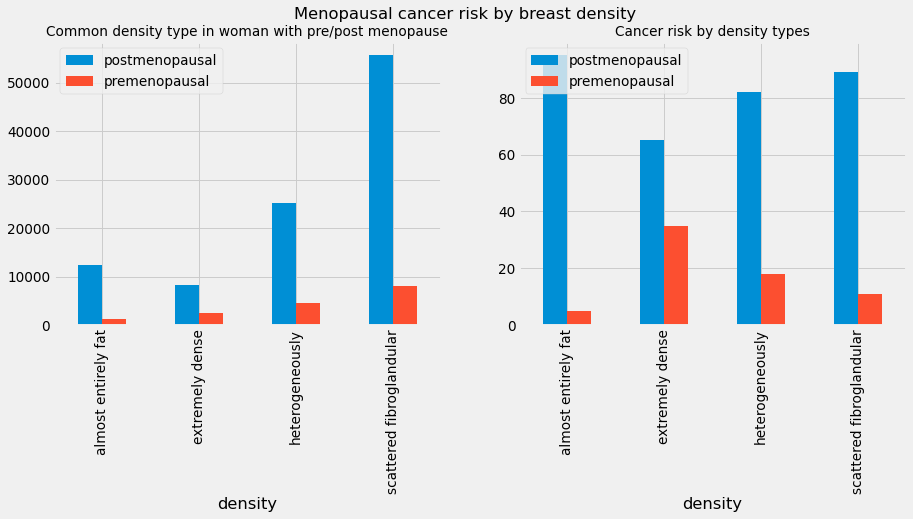

In [26]:
# What is common type of breast density in woman with pre or post menopause.
# What is risk of cancer with dense breast?
a = df_train.groupby(by=['density', 'menopaus']).count()['id']
b = round(df_train[df_train.cancer=='yes'].groupby(by=['density', 'menopaus']).count()['id']*100/df_train[df_train.cancer=='yes'].groupby(by='density').count()['id'])

# visualization
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle("Menopausal cancer risk by breast density")

# plot-1
a.unstack().plot(kind='bar', ax=ax1)
ax1.set_title("Common density type in woman with pre/post menopause", size=14)
ax1.legend()

# plot-2
b.unstack().plot(kind='bar', ax=ax2)
ax2.set_title("Cancer risk by density types", size=14)
ax2.legend()
plt.show()

The `scattered fibroglandular` is common type of breast density in women with postmenopausal and premenopausal. Women with postmenopausal have higher risk of breast cancer for dense breast as compare to the women with pre-menopausal.

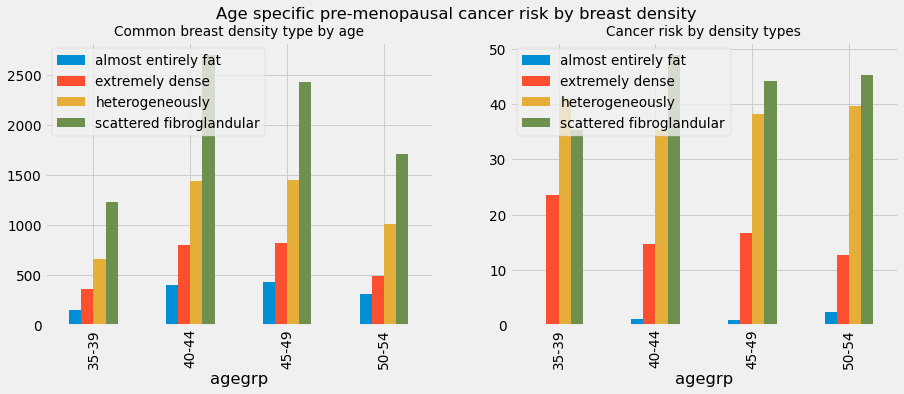

In [27]:
# For woman with pre-menopausal
# What is risk of cancer with different age groups and density values?
a = df_train[df_train.menopaus=='premenopausal'].groupby(by=['agegrp', 'density']).count()['id']
raw_b = df_train[(df_train.menopaus=='premenopausal') & (df_train.cancer=='yes')]
b = raw_b.groupby(by=['agegrp', 'density']).count()['id']*100/raw_b.groupby(by='agegrp').count()['id']

# visualization
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle("Age specific pre-menopausal cancer risk by breast density", )

# plot-1
a.unstack().plot(kind='bar', ax=ax1)
ax1.set_title("Common breast density type by age", size=14)
ax1.legend()

# plot-2
b.unstack().plot(kind='bar', ax=ax2)
ax2.set_title("Cancer risk by density types", size=14)
ax2.legend()

plt.show()

`Scattered fibroglandular` seems to be a common type of breast density in woman with pre-menopausal. Overall cancer risk with `Scattered fibroglandular` breast density for different age group of woman with premenopausal is ~48%.

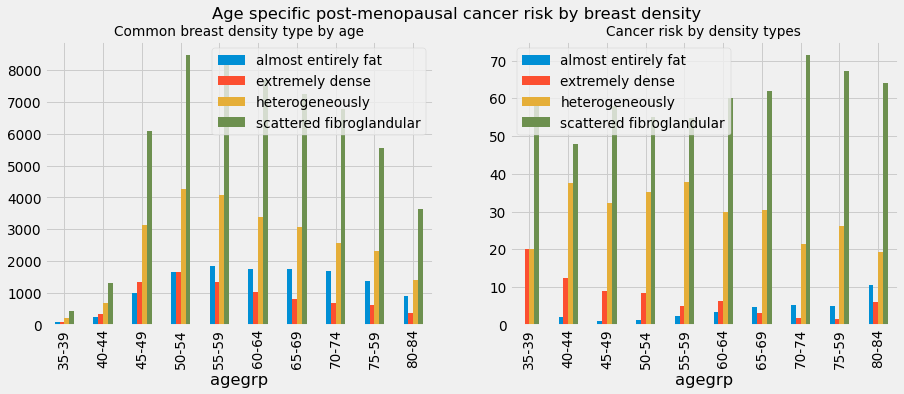

In [28]:
# For woman with post-menopausal
# What is risk of cancer with different age groups and density values?
a = df_train[df_train.menopaus=='postmenopausal'].groupby(by=['agegrp', 'density']).count()['id']
raw_b = df_train[(df_train.menopaus=='postmenopausal') & (df_train.cancer=='yes')]
b = raw_b.groupby(by=['agegrp', 'density']).count()['id']*100 /raw_b.groupby(by='agegrp').count()['id']

# visualization
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle("Age specific post-menopausal cancer risk by breast density")

# plot-1
a.unstack().plot(kind='bar', ax=ax1)
ax1.set_title("Common breast density type by age", size=14)
ax1.legend()

# plot-2
b.unstack().plot(kind='bar', ax=ax2)
ax2.set_title("Cancer risk by density types",  size=14)
ax2.legend()

plt.show()

The `Scattered fibroglandular` is common type of breast density in women with post-menopausal as well. More than 50% of cancer risk is observed in all age group of woman with postmenopausal with scattered fibroglandular dense breast. Overall cancer risk with `Scattered fibroglandular` breast density for different age group of woman with postmenopausal is ~61%.

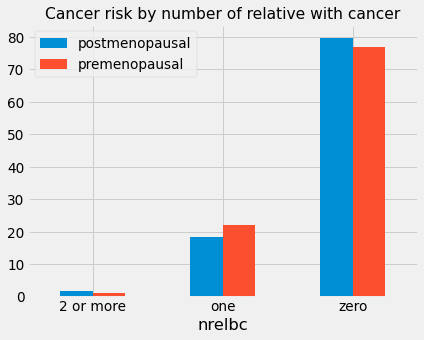

In [29]:
# what is relation between risk of cancer with nrelbc and menopause
# Does the cancer risk increase if there is relative with breast cancer.

a = df_train[df_train.cancer=='yes'].groupby(by=['nrelbc', 'menopaus']).count()['id'] *100 / df_train[df_train.cancer=='yes'].groupby(by=['menopaus']).count()['id']
a.unstack().plot(kind='bar')

plt.title("Cancer risk by number of relative with cancer", size=16)
plt.xticks(rotation=0)

plt.legend()
plt.show()

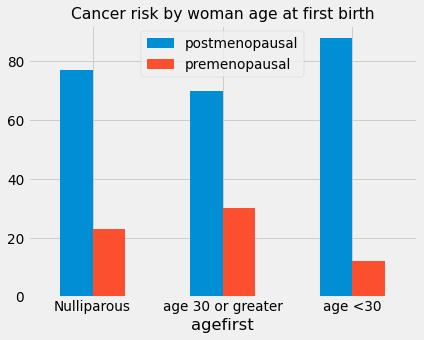

In [30]:
# Does the cancer risk different for different age at a time of first birth.
a = df_train[df_train.cancer=='yes'].groupby(by=['agefirst', 'menopaus']).count()['id'] * 100 /  df_train[df_train.cancer=='yes'].groupby(by=['agefirst']).count()['id']
a.unstack().plot(kind='bar')

plt.title("Cancer risk by woman age at first birth", size=16)
plt.xticks(rotation=0)

plt.legend()
plt.show()

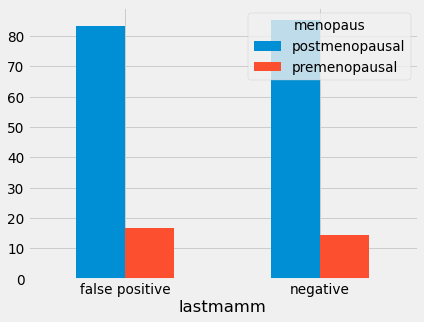

In [31]:
# What is effect of lastmamm results on having a cancer.

a = df_train[df_train.cancer=='yes'].groupby(by=['lastmamm', 'menopaus']).count()['id']*100 / df_train[df_train.cancer=='yes'].groupby(by=['lastmamm']).count()['id']
a.unstack().plot(kind='bar')
plt.xticks(rotation=0)

plt.show()

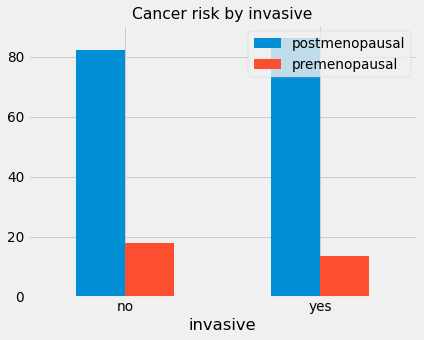

In [32]:
# Cancer risk by invasive

a = df_train[df_train.cancer=='yes'].groupby(by=['invasive', 'menopaus']).count()['id'] * 100/ df_train[df_train.cancer=='yes'].groupby(by=['invasive']).count()['id']
a.unstack().plot(kind='bar')

plt.title("Cancer risk by invasive", size=16)
plt.xticks(rotation=0)

plt.legend()
plt.show()